# Libraries and dataset

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
#import pandas_profiling as pp

In [22]:
# Reading dataset
df = pd.read_csv('./data/kidney_disease.csv')
df.describe()
(df.isnull().sum()/df.shape[0] * 100.00).round(2)

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [23]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
print('the dataset shape:', df.shape)

the dataset shape: (400, 26)


# Cleaning data

## Categorical data

In [25]:
# Deleting 'id' column, because it is unique
df.drop('id', axis= 1, inplace= True)

In [26]:
# Getting categorical columns
cat_cols = [col for col in df.columns if df[col].dtype=='object'] # cat_col: categorical columns

for col in cat_cols:
    print('{} has {} values '.format(col,df[col].unique()))

rbc has [nan 'normal' 'abnormal'] values 
pc has ['normal' 'abnormal' nan] values 
pcc has ['notpresent' 'present' nan] values 
ba has ['notpresent' 'present' nan] values 
pcv has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values 
wc has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '74

In [27]:
# Converting 'pcv', 'wc', 'rc' as numeric, because they seem to be numeric

df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

cat_cols = [col for col in df.columns if df[col].dtype=='object'] # cat_col: categorical columns


In [28]:
# Replace some values such as '\t', ' '
df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['cad']= df['cad'].replace(to_replace ='\tno', value='no')
df['classification']= df['classification'].replace(to_replace ='ckd\t', value='ckd')

## Numerical data

In [29]:
num_cols = [col for col in df.columns if df[col].dtype !='object'] # num_cols: numerical columns

print('Numerical columns')
print(num_cols)

Numerical columns
['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


# Missing data

In [30]:
# Handling missing values
df.isna().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## Categorical data

In [31]:
# check for catagorical cols
df[cat_cols].isna().sum().sort_values(ascending=False)

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [32]:
# Inputando con la moda
def impute_mode(feature):
    print(feature)
    print(df[feature].value_counts())
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

for col in cat_cols:
    impute_mode(col)

rbc
normal      201
abnormal     47
Name: rbc, dtype: int64
pc
normal      259
abnormal     76
Name: pc, dtype: int64
pcc
notpresent    354
present        42
Name: pcc, dtype: int64
ba
notpresent    374
present        22
Name: ba, dtype: int64
htn
no     251
yes    147
Name: htn, dtype: int64
dm
no     261
yes    137
Name: dm, dtype: int64
cad
no     364
yes     34
Name: cad, dtype: int64
appet
good    317
poor     82
Name: appet, dtype: int64
pe
no     323
yes     76
Name: pe, dtype: int64
ane
no     339
yes     60
Name: ane, dtype: int64
classification
ckd       250
notckd    150
Name: classification, dtype: int64


In [33]:
# Convirtiendo a numérico
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

## Numerical data

In [34]:
# check just for numerical cols
df[num_cols].isna().sum().sort_values(ascending=False)

rc      131
wc      106
pot      88
sod      87
pcv      71
hemo     52
su       49
sg       47
al       46
bgr      44
bu       19
sc       17
bp       12
age       9
dtype: int64

In [35]:
# Usando la media
def imputation(feature, new_feature):
    mean = df[feature].mean()
    print(feature, ':', mean)
    df[new_feature] = df[feature].fillna(mean)

for col in num_cols:
    imputation(col, 'mean'+col)

age : 51.48337595907928
bp : 76.46907216494846
sg : 1.0174079320113256
al : 1.0169491525423728
su : 0.45014245014245013
bgr : 148.0365168539326
bu : 57.425721784776904
sc : 3.0724543080939934
sod : 137.52875399361022
pot : 4.627243589743592
hemo : 12.526436781609195
pcv : 38.88449848024316
wc : 8406.122448979591
rc : 4.707434944237919


In [36]:
# Usando el KNN Inputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
dfinputer = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

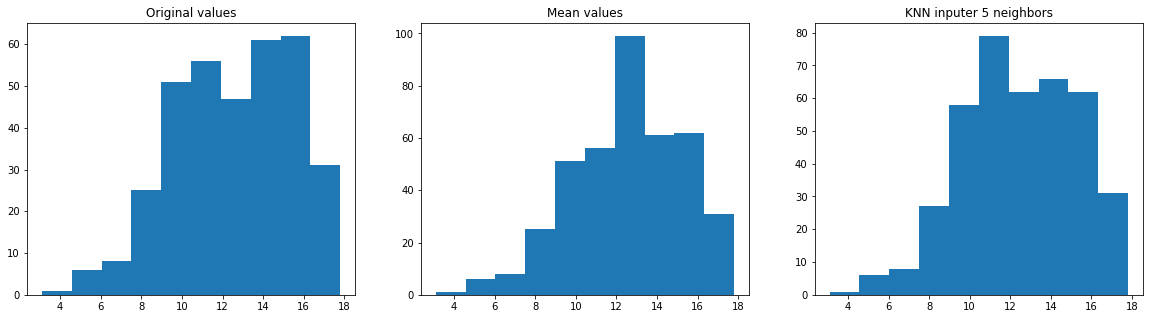

In [37]:
# Comparando resultados
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].hist(df['hemo'], bins=10)
ax[0].set_title('Original values')

ax[1].hist(df['meanhemo'], bins=10)
ax[1].set_title('Mean values')

ax[2].hist(dfinputer['hemo'], bins=10)
ax[2].set_title('KNN inputer 5 neighbors')

plt.show()

In [38]:
# Deleting no-win values
for col in num_cols:
    df[col] = dfinputer[col]

    mean_name = 'mean'+col
    df.drop(mean_name, axis=1, inplace=True) # deleting mean

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int32  
 6   pc              400 non-null    int32  
 7   pcc             400 non-null    int32  
 8   ba              400 non-null    int32  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [40]:
df.to_csv('./data/KD.csv')